In [1]:
import pickle
import datetime
import numpy as np
from sklearn import decomposition
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.cluster import KMeans
from numpy import linalg as LA

# %matplotlib notebook
# %pylab inline

In [2]:
pickle_file_name = 'exp_07_22_good_data.p'

In [3]:
# importing saved data from our July 15th experiment
data_with_time_array = pickle.load(open(pickle_file_name, 'rb'))

In [4]:
# checking end timestamp of data
datetime.datetime.fromtimestamp(data_with_time_array[-1,12])

datetime.datetime(2020, 7, 22, 17, 46, 46, 449567)

In [5]:
# omitting the last column which has timestamps
data = data_with_time_array[:,:12]

In [6]:
data.shape

(834159, 12)

In [7]:
# calculating nanmean and subtracting it from data. Then replacing all nans by 0

data_mean = np.nanmean(data,axis = 0,keepdims = True)

data = data - data_mean

cdata=np.nan_to_num(data)

/home/chaitanya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
def eig_calc(mean_centered_data, dimension = 12, block_size = 10000):
    """calculates covariance matrix in batches of block_size and returns its eig vals and eig vecs"""
    n=mean_centered_data.shape[0]
    outters = np.zeros((dimension, dimension))
    for j in range(n):
        outters += np.outer(mean_centered_data[j,:],mean_centered_data[j,:])
        if j%block_size==0:
            print('\r %d: '%j,end='')
    _cov = outters/n
    #eigen values
    eigen_values, eigen_vectors = LA.eig(_cov)
    return(eigen_values,eigen_vectors)

In [9]:
eigen_values, eigen_vectors = eig_calc(cdata)

 830000: 

In [ ]:
# # calculating the covariance matrix
# d=12  # dimension
# n=cdata.shape[0]
# block_size=10000
# # calculate covariance matrix

# outters = np.zeros((d, d))
# for j in range(n):
#     outters += np.outer(cdata[j,:],cdata[j,:])
#     if j%block_size==0:
#         print('\r %d: '%j,end='')
    
# _cov = outters/n

# #eigen values
# eigen_values, eigen_vectors = LA.eig(_cov)

In [10]:
eigen_values

array([0.08157498, 0.0751513 , 0.06772562, 0.02533942, 0.00970458,
       0.00740446, 0.00254799, 0.00053172, 0.00078206, 0.        ,
       0.        , 0.        ])

In [11]:
# sorting eigenvalues according to magnitude

eig_val_sorted_indices = np.argsort(eigen_values)
print(eig_val_sorted_indices)
eig_val_sorted_indices = eig_val_sorted_indices[-1::-1]
print(eig_val_sorted_indices)
eig_val_sorted_indices.shape

[ 9 10 11  7  8  6  5  4  3  2  1  0]
[ 0  1  2  3  4  5  6  8  7 11 10  9]


(12,)

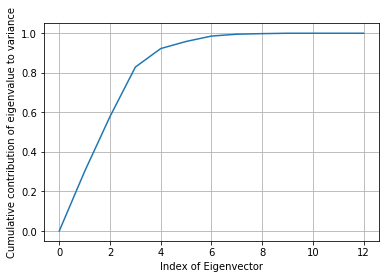

In [12]:
eig_val_ordered=eigen_values[eig_val_sorted_indices]
eig_val_cumul = np.cumsum(eig_val_ordered)
eig_val_cumul /= eig_val_cumul[-1]
plt.plot([0]+list(eig_val_cumul))
plt.xlabel('Index of Eigenvector')
plt.ylabel('Cumulative contribution of eigenvalue to variance')
plt.grid()


In [13]:
sorted_eigvec = eigen_vectors[:,eig_val_sorted_indices]

In [14]:
# projecting the mean subtracted data onto the most important eigenvectors

data_proj_ev1 = np.dot(cdata,sorted_eigvec[:,:2])

### Projecting on all Eigenvectors (July 24)

In [15]:
all_data_proj = np.dot(cdata, sorted_eigvec[:,:])

In [ ]:
# import matplotlib
# matplotlib.use('TkAgg')
# for i in range(cdata.shape[0]):
#     if(i%1000== 0):
#         plt.cla()
#         proj = all_data_proj[i]
#         plt.xlabel('Eigenvector Index')
#         plt.ylabel('Magnitude of Projection')
#         plt.title('Animating projections (downsampled by a factor of 1000)')
#         plt.plot(proj, 'o')
#         plt.ylim(-1.5,1.5)
#         plt.pause(0.05)

### Plot settings

In [16]:
#setting limits - right indicates upper limit and left indicates lower limit
righty = 1.25
lefty = -1
rightx = 1.5
leftx = -1.5

### Plotting on Eigenvectors

In [17]:
N=data_proj_ev1.shape[0]
time_axis = np.arange(N)
type(time_axis)

numpy.ndarray

Each plot represents activity for 280.0 seconds


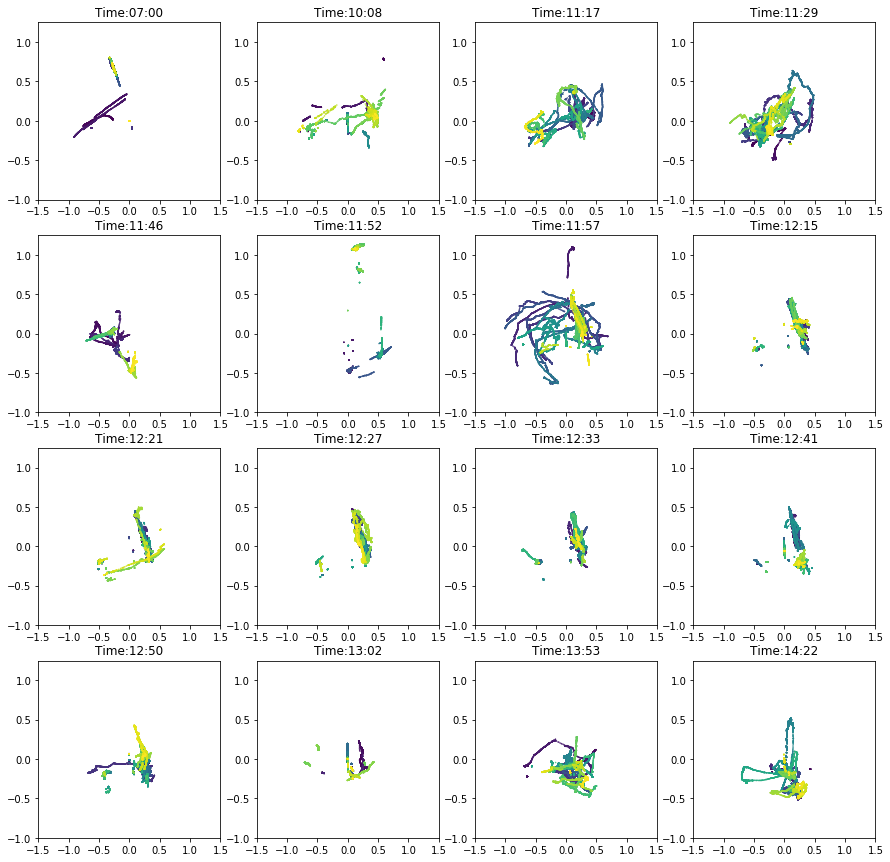

In [18]:
# plotting projections for all data (not just some interval during the day)

figure(figsize=[15,15])
Length=35000
print("Each plot represents activity for " + str(Length * 0.008) + " seconds")
i=1
for T1 in range(0,data.shape[0],Length):
    plt.subplot(4,4,i)
    
    plt.title(str("Time:")+str(datetime.datetime.fromtimestamp(data_with_time_array[T1,12]))[11:16])
    plt.scatter(data_proj_ev1[T1:T1+Length,0], data_proj_ev1[T1:T1+Length,1],marker='.',s=1,c=np.arange(T1,T1+Length))
    
    plt.xlim(leftx,rightx)
    plt.ylim(lefty,righty)
    i=i+1
    if (i>16):
        break

### Plotting interval data

In [20]:
experiment_date = '22'

In [21]:
# setting the start and end times in the correct format
# this cell converts date and hour into timestamp and prints the starting and ending timestamps

format_timestring = '%b %d %Y %I:%M%p'
print("The date of the experiment was", experiment_date)
start_timestring = 'Jul ' + experiment_date+ ' 2020 11:50AM'
end_timestring = 'Jul ' + experiment_date+ ' 2020 12:00PM'
start_standard_dt_string = datetime.datetime.strptime(start_timestring, format_timestring)
end_standard_dt_string = datetime.datetime.strptime(end_timestring, format_timestring)

print(start_standard_dt_string)
print(end_standard_dt_string)



The date of the experiment was 22
2020-07-22 11:50:00
2020-07-22 12:00:00


In [22]:
# given the starting and ending timestamps, we map them to indices of the data so that
# we know our time of interest in terms on indices

for x in range(data_with_time_array.shape[0]):
    if(data_with_time_array[x,12] > datetime.datetime.timestamp(start_standard_dt_string) and data_with_time_array[x,12] < datetime.datetime.timestamp(end_standard_dt_string)):
        start_index = x
        break
for y in range(x,data_with_time_array.shape[0]):
    if(data_with_time_array[y,12] > datetime.datetime.timestamp(end_standard_dt_string)):
        end_index = y
        break

Each plot represents activity for 563.248 seconds


Text(0.5, 0, 'Projection of data on largest eigenvector')

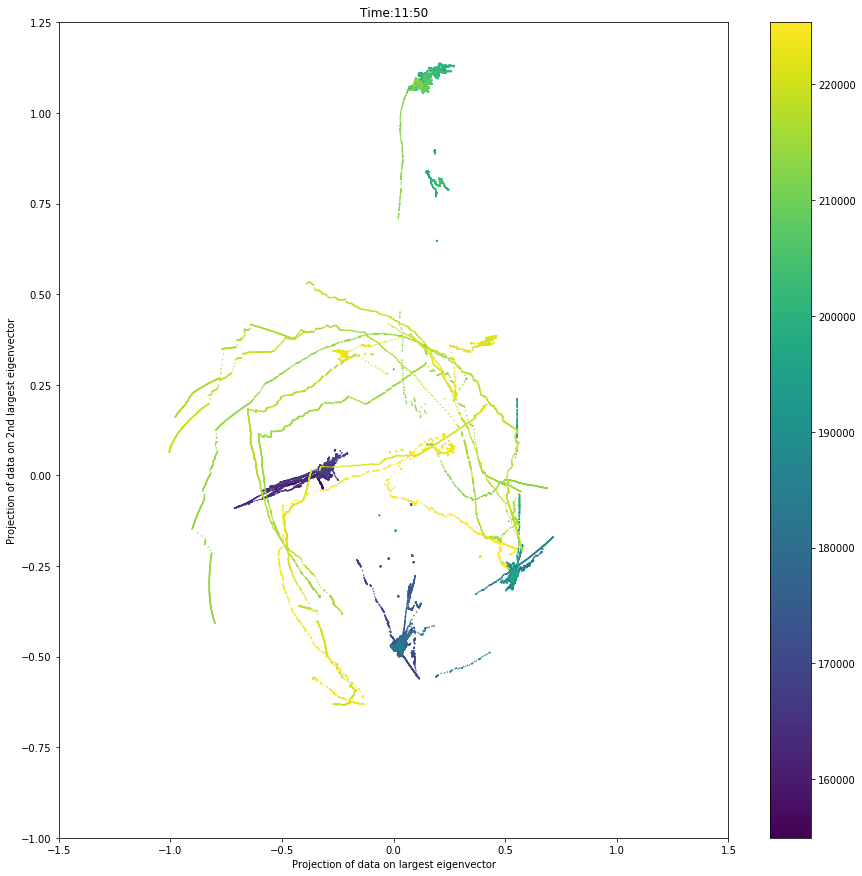

In [23]:
# we can plot the data for our time of interest

figure(figsize=[15,15])
Length= y - x
print("Each plot represents activity for " + str(Length * 0.008) + " seconds")

plt.title(str("Time:")+str(datetime.datetime.fromtimestamp(data_with_time_array[x,12]))[11:16])
scp = plt.scatter(data_proj_ev1[x:y,0], data_proj_ev1[x:y,1],marker='.',s=1,c=np.arange(x,y))
cb_scp = plt.colorbar(scp)
plt.xlim(leftx,rightx)
plt.ylim(lefty,righty)
plt.ylabel('Projection of data on 2nd largest eigenvector')
plt.xlabel('Projection of data on largest eigenvector')


### Plotting interesting data from the July 22nd experiment, printing timestamps on plot

In [24]:
# extracting only the relevant x and y coordinates
relevant_data_projections = data_proj_ev1[x:y]
relevant_data_projections.shape

(70406, 2)

Each plot represents activity for 32.0 seconds


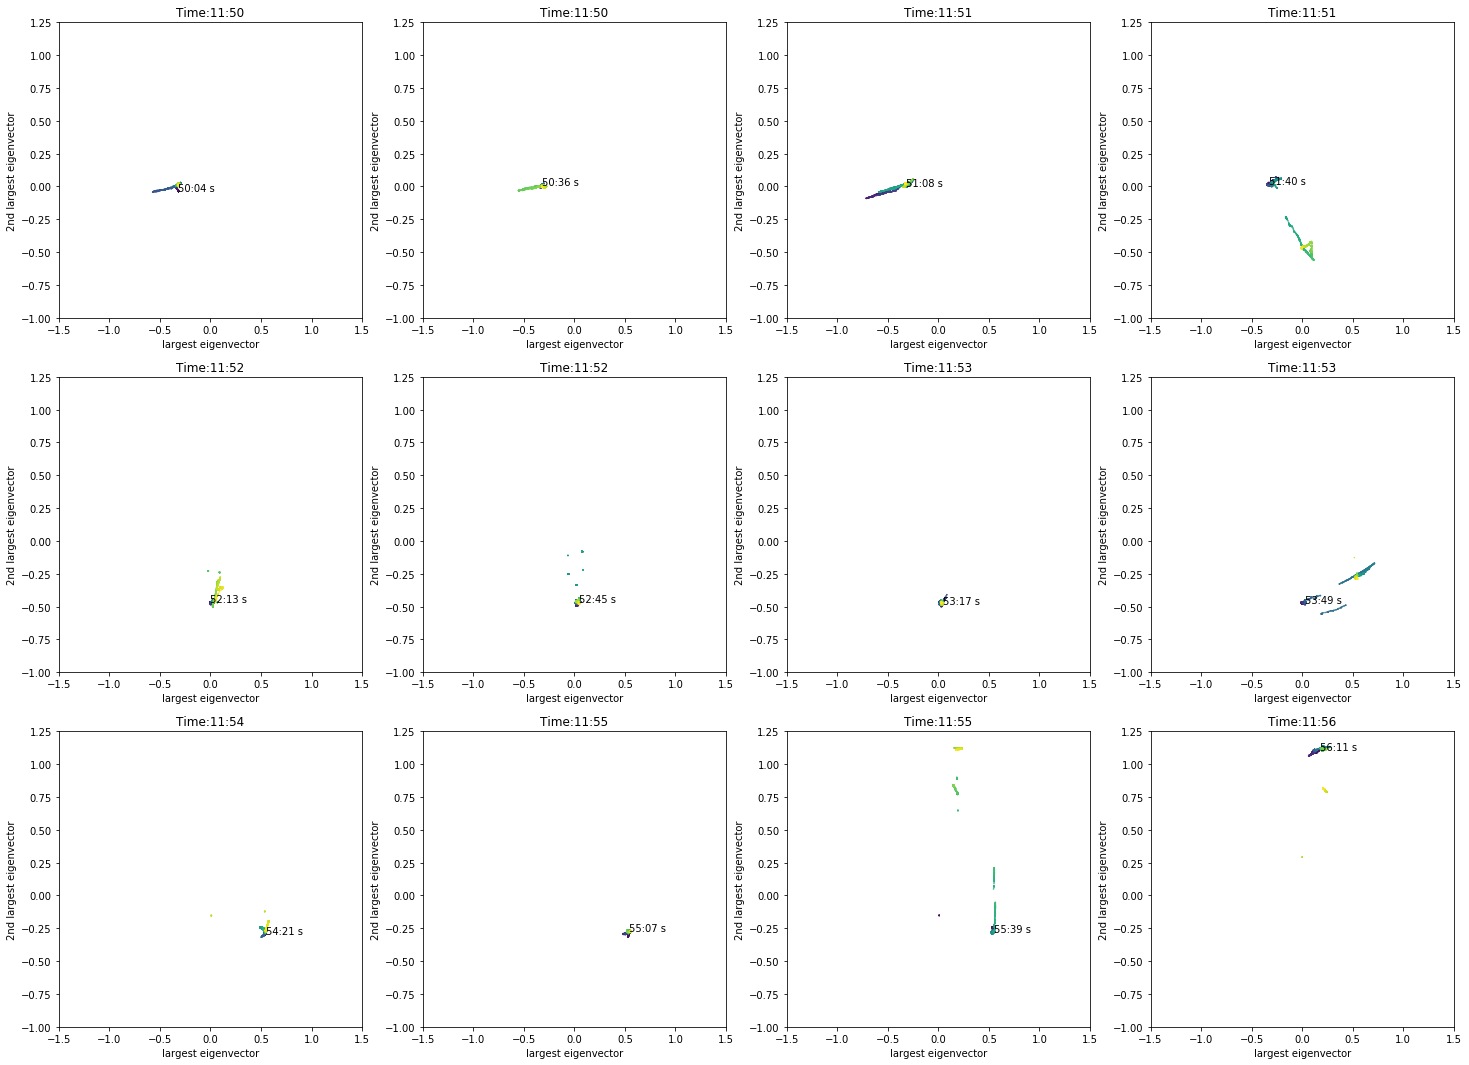

In [25]:
# plotting the relevant data

figure(figsize=[25,25])
Length=4000
print("Each plot represents activity for " + str(Length * 0.008) + " seconds")
i=1
for T1 in range(0,relevant_data_projections.shape[0],Length):
    plt.subplot(4,4,i)
#     print(data_with_time[T1,12])
#     print(datetime.datetime.fromtimestamp(data_with_time[T1,12]))
    plt.title(str("Time:")+str(datetime.datetime.fromtimestamp(data_with_time_array[x+T1,12]))[11:16])
    plt.scatter(relevant_data_projections[T1:T1+Length,0], relevant_data_projections[T1:T1+Length,1],marker='.',s=1,c=np.arange(T1,T1+Length))
    plt.colorbar
    plt.xlim(leftx,rightx)
    plt.ylim(lefty,righty)
    plt.text(relevant_data_projections[T1,0],relevant_data_projections[T1,1], str(datetime.datetime.fromtimestamp(data_with_time_array[x+T1,12]))[14:19] + ' s')
    plt.xlabel('largest eigenvector')
    plt.ylabel('2nd largest eigenvector')
    i=i+1
    if (i>12):
        break

### Printing multiple timestamps on the plot

In [ ]:
# plotting the relevant data

figure(figsize=[25,25])
Length=4000
print("Each plot represents activity for " + str(Length * 0.008) + " seconds")
i=1
for T1 in range(0,relevant_data_projections.shape[0],Length):
    plt.subplot(4,4,i)
#     print(data_with_time[T1,12])
#     print(datetime.datetime.fromtimestamp(data_with_time[T1,12]))
    plt.title(str("Time:")+str(datetime.datetime.fromtimestamp(data_with_time_array[x+T1,12]))[11:16])
    plt.scatter(relevant_data_projections[T1:T1+Length,0], relevant_data_projections[T1:T1+Length,1],marker='.',s=1,c=np.arange(T1,T1+Length))
    plt.colorbar
    plt.xlim(leftx,rightx)
    plt.ylim(lefty,righty)
    k = 0
    #######################################################
    #comment in for multiple texts within the same plot and comment out the next plt.text command
    while(k!=4):
        plt.text(relevant_data_projections[T1+k*1000,0],relevant_data_projections[T1+k*1000,1], str(datetime.datetime.fromtimestamp(data_with_time_array[x+T1+k*1000,12]))[14:19] + ' s')
        k = k + 1
    ########################################################
    
#     plt.text(relevant_data_projections[T1,0],relevant_data_projections[T1,1], str(datetime.datetime.fromtimestamp(data_with_time_array[x+T1,12]))[14:19] + ' s')
    plt.xlabel('largest eigenvector')
    plt.ylabel('2nd largest eigenvector')
    i=i+1
    if (i>12):
        break

### Using ginput to get nearest point, highlight it and obtain its timestamp - July 22nd

In [ ]:
# setting the start and end times in the correct format
# this cell converts date and hour into timestamp and prints the starting and ending timestamps

format_timestring = '%b %d %Y %I:%M:%S%p'

start_timestring = 'Jul ' + experiment_date+ ' 2020 11:58:00AM'
end_timestring = 'Jul ' + experiment_date+ ' 2020 12:00:00PM'
start_standard_dt_string = datetime.datetime.strptime(start_timestring, format_timestring)
end_standard_dt_string = datetime.datetime.strptime(end_timestring, format_timestring)

print(start_standard_dt_string)
print(end_standard_dt_string)

# given the starting and ending timestamps, we map them to indices of the data so that
# we know our time of interest in terms on indices

for x in range(data_with_time_array.shape[0]):
    if(data_with_time_array[x,12] > datetime.datetime.timestamp(start_standard_dt_string) and data_with_time_array[x,12] < datetime.datetime.timestamp(end_standard_dt_string)):
        start_index = x
        break
for y in range(x,data_with_time_array.shape[0]):
    if(data_with_time_array[y,12] > datetime.datetime.timestamp(end_standard_dt_string)):
        end_index = y
        break
        


In [ ]:
# extracting time stamp from click
import matplotlib
matplotlib.use('TkAgg')
plt.figure(figsize=[15,15])
Length= y - x
print("Length:" + " " + str(Length))
print("Each plot represents activity for " + str(Length * 0.008) + " seconds")

plt.title(str("Time:")+str(datetime.datetime.fromtimestamp(data_with_time_array[x,12]))[11:16])
scp = plt.scatter(data_proj_ev1[x:y,0], data_proj_ev1[x:y,1],marker='.',s=1,c=np.arange(x,y))
cb_scp = plt.colorbar(scp)
plt.xlim(leftx,rightx)
plt.ylim(lefty,righty)
plt.ylabel('Projection of data on 2nd largest eigenvector')
plt.xlabel('Projection of data on largest eigenvector')

print("Please click")
point_list = plt.ginput(1)
print("clicked", point_list)
plt.show()



# creating ckdtree out of all our points of interest
import scipy
ckdtree = scipy.spatial.cKDTree(data_proj_ev1[x:y])
# extracting the x and y coordinates of points from the ginput output list of tuples
x_coor = point_list[0][0]
y_coor = point_list[0][1]

plt.scatter(point_list[0][0], point_list[0][1],c = 'r', marker = "+")

print(x_coor,y_coor)
# finding the index of the nearest point using ckdtree
a = ckdtree.query([x_coor,y_coor])[1]
# index is therefore x + a
ind = x + a
time_stamp_nearest_neighbour = datetime.datetime.fromtimestamp(data_with_time_array[ind,12])
print(time_stamp_nearest_neighbour)

### Playing audio between timestamps - July 23rd

In [29]:
# setting the start and end times in the correct format
# this cell converts date and hour into timestamp and prints the starting and ending timestamps

format_timestring = '%b %d %Y %I:%M:%S%p'

start_timestring = 'Jul ' + experiment_date+ ' 2020 11:59:00AM'
end_timestring = 'Jul ' + experiment_date+ ' 2020 12:00:00PM'
start_standard_dt_string = datetime.datetime.strptime(start_timestring, format_timestring)
end_standard_dt_string = datetime.datetime.strptime(end_timestring, format_timestring)

print(start_standard_dt_string)
print(end_standard_dt_string)

# given the starting and echait64mitnding timestamps, we map them to indices of the data so that
# we know our time of interest in terms on indices

for x in range(data_with_time_array.shape[0]):
    if(data_with_time_array[x,12] > datetime.datetime.timestamp(start_standard_dt_string) and data_with_time_array[x,12] < datetime.datetime.timestamp(end_standard_dt_string)):
        start_index = x
        break
for y in range(x,data_with_time_array.shape[0]):
    if(data_with_time_array[y,12] > datetime.datetime.timestamp(end_standard_dt_string)):
        end_index = y
        break
        


2020-07-22 11:59:00
2020-07-22 12:00:00


Data for  6123  points is plotted below
This plot represents activity for 48.984 seconds
Select two data points
You clicked these points: [(-0.2679211469534051, -0.6342633203650756), (-0.35752688172043023, 0.001538446085751044)]
-0.2679211469534051 -0.6342633203650756
2020-07-22 11:59:09.012086
-0.35752688172043023 0.001538446085751044
2020-07-22 11:59:17.033077
The raw timestamps are: [1595444349.012086, 1595444357.033077]
The absolute indices of the two points selected are: [220226, 221229]
3920193 4048529


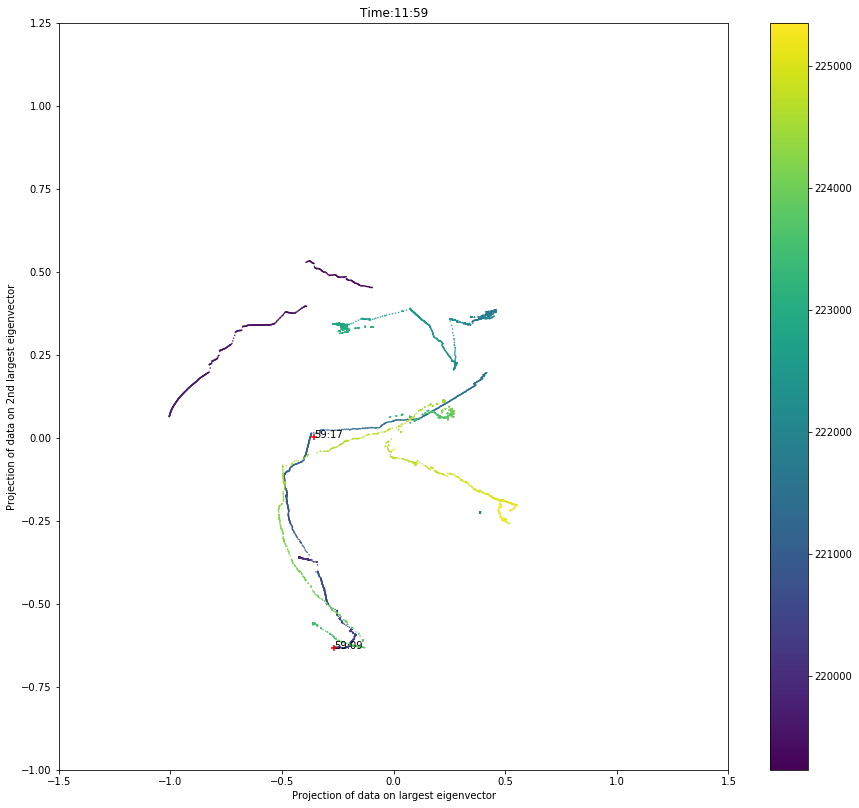

In [49]:
# probably buggy. Does not play audio so well. Plot channel time series maybe.
# we can plot the data for our time of interest
import matplotlib
matplotlib.use('TkAgg')
plt.figure(figsize=[15,15])
Length= y - x
print("Data for ", Length, " points is plotted below")
print("This plot represents activity for " + str(Length * 0.008) + " seconds")

plt.title(str("Time:")+str(datetime.datetime.fromtimestamp(data_with_time_array[x,12]))[11:16])
scp = plt.scatter(data_proj_ev1[x:y,0], data_proj_ev1[x:y,1],marker='.',s=1,c=np.arange(x,y))
cb_scp = plt.colorbar(scp)
plt.xlim(leftx,rightx)
plt.ylim(lefty,righty)
plt.ylabel('Projection of data on 2nd largest eigenvector')
plt.xlabel('Projection of data on largest eigenvector')
print("Select two data points")
point_list = plt.ginput(2)
print("You clicked these points:", point_list)
plt.show()


# extract timestamps of two points
list_timestamps = []
list_raw_timestamps = []
list_indices = []
# creating ckdtree out of all our points of interest
import scipy
ckdtree = scipy.spatial.cKDTree(data_proj_ev1[x:y])
# extracting the x and y coordinates of points from the ginput output list of tuples
for i in range(2):
    x_coor = point_list[i][0]
    y_coor = point_list[i][1]
    a = ckdtree.query([x_coor,y_coor])[1]
    ind = x + a
    list_indices.append(ind)
    plt.scatter(x_coor, y_coor,c = 'r', marker = "+")
    plt.text(x_coor,y_coor, str(datetime.datetime.fromtimestamp(data_with_time_array[ind,12]))[14:19]) ####
    
    print(x_coor,y_coor)
    # finding the index of the nearest point using ckdtree
    # index is therefore x + a
    
    list_raw_timestamps.append(data_with_time_array[ind,12])
    time_stamp_nearest_neighbour = datetime.datetime.fromtimestamp(data_with_time_array[ind,12])
    print(time_stamp_nearest_neighbour)
    list_timestamps.append(time_stamp_nearest_neighbour)


# arranging raw timestamps in increasing order
list_raw_timestamps.sort()
print("The raw timestamps are:", list_raw_timestamps)
list_indices.sort()
print("The absolute indices of the two points selected are:", list_indices)

# obtaining audio from raw files
# Load data


import soundfile as sf
import sounddevice
import math
import pandas as pd
import itertools
import time
from functools import lru_cache


# data,samplerate = sf.read('postfiltered_2020-07-22_11_55_04_0.raw', 
#                channels=4, 
#                samplerate=16000,
#                subtype='PCM_16'



data,samplerate = sf.read('/home/chaitanya/Documents/test_notebooks/July22/postfiltered_2020-07-22_11_55_04_0 .raw', 
               channels=4, 
               samplerate=16000,
               subtype='PCM_16'
                         )
format_timestring = '%b %d %Y %I:%M:%S%p'
T_s = 'Jul 22 2020 11:55:04AM'
T_s_std_str = datetime.datetime.strptime(T_s, format_timestring)
T_s_unix = datetime.datetime.timestamp(T_s_std_str)
sample_begin = int(round((list_raw_timestamps[0] - T_s_unix)*samplerate))
sample_end = int(round((list_raw_timestamps[1]-T_s_unix)*samplerate))
print((sample_begin),(sample_end))


full_data = data[sample_begin:sample_end,0]


# Sound playback
sounddevice.play(full_data, samplerate)
time.sleep(1) 




### Animating eig_vec projections - July 24

Stepping through projections of  922  data points...


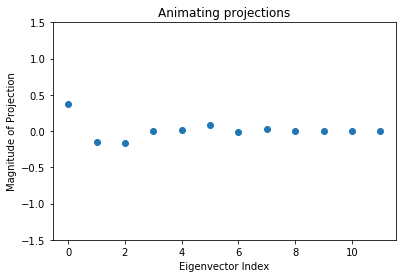

In [42]:
print("Stepping through projections of ", list_indices[1] - list_indices[0], " data points...")
for i in range(list_indices[1] - list_indices[0]):
#     if(i%100== 0):
    plt.cla()
    proj = all_data_proj[list_indices[0]+i]
    plt.xlabel('Eigenvector Index')
    plt.ylabel('Magnitude of Projection')
    plt.title('Animating projections')
    plt.plot(proj, 'o')
    plt.ylim(-1.5,1.5)
    plt.pause(0.05)

### Plotting a spectrogram
Input: start_index, end_index  
Output: spectrogram

In [45]:
print(sample_begin, sample_end)

4416775 4531400


Text(0, 0.5, 'Value')

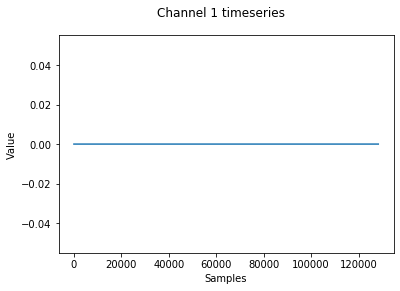

In [50]:
# plot just the timeseries

# From yihan's readAudio code

fig, ax1 = plt.subplots(1, 1)
fig.suptitle('Channel 1 timeseries')
ax1.plot(full_data)
plt.xlabel('Samples')
plt.ylabel('Value')

/home/chaitanya/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:7747: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
/home/chaitanya/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/home/chaitanya/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/home/chaitanya/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/home/chaitanya/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/home/chaitanya/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:722: UserWarning: Warn

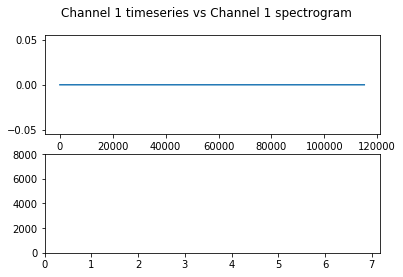

In [36]:
# From yihan's readAudio code


fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Channel 1 timeseries vs Channel 1 spectrogram')
ax1.plot(full_data)
a, b, c, to_plot = ax2.specgram(data[sample_begin:sample_end,0],NFFT=1024, Fs = samplerate,noverlap = 0)

### Trying to animate

In [ ]:
# we can plot the data for our time of interest
plt.figure(figsize=[15,15])
Length= y - x
print("Length:" + " " + str(Length))
print("Each plot represents activity for " + str(Length * 0.008) + " seconds")

plt.title(str("Time:")+str(datetime.datetime.fromtimestamp(data_with_time_array[x,12]))[11:16])
scp = plt.scatter(data_proj_ev1[x:y,0], data_proj_ev1[x:y,1],marker='.',s=1,c=np.arange(x,y))
cb_scp = plt.colorbar(scp)
plt.xlim(leftx,rightx)
plt.ylim(lefty,righty)
plt.ylabel('Projection of data on 2nd largest eigenvector')
plt.xlabel('Projection of data on largest eigenvector')
print("Select two data points")
point_list = plt.ginput(2)
print("You clicked these points:", point_list)
plt.show()


# extract timestamps of two points
list_timestamps = []
list_raw_timestamps = []
# creating ckdtree out of all our points of interest
import scipy
ckdtree = scipy.spatial.cKDTree(data_proj_ev1[x:y])
# extracting the x and y coordinates of points from the ginput output list of tuples
for i in range(2):
    x_coor = point_list[i][0]
    y_coor = point_list[i][1]
    a = ckdtree.query([x_coor,y_coor])[1]
    ind = x + a
    plt.scatter(x_coor, y_coor,c = 'r', marker = "+")
    plt.text(x_coor,y_coor, str(datetime.datetime.fromtimestamp(data_with_time_array[ind,12]))[14:19]) ####
    
    print(x_coor,y_coor)
    # finding the index of the nearest point using ckdtree
    # index is therefore x + a
    
    list_raw_timestamps.append(data_with_time_array[ind,12])
    time_stamp_nearest_neighbour = datetime.datetime.fromtimestamp(data_with_time_array[ind,12])
    print(time_stamp_nearest_neighbour)
    list_timestamps.append(time_stamp_nearest_neighbour)


# arranging raw timestamps in increasing order
list_raw_timestamps.sort()
print(list_raw_timestamps)

# obtaining audio from raw files
# Load data


import soundfile as sf
import sounddevice
import math
import pandas as pd
import itertools
import time
from functools import lru_cache

data,samplerate = sf.read('/home/chaitanya/Documents/test_notebooks/postfiltered_2020-07-15_13_40_04_0.raw', 
               channels=4, 
               samplerate=16000,
               subtype='PCM_16'
                         )
format_timestring = '%b %d %Y %I:%M:%S%p'
T_s = 'Jul 15 2020 01:40:04PM'
T_s_std_str = datetime.datetime.strptime(T_s, format_timestring)
T_s_unix = datetime.datetime.timestamp(T_s_std_str)
sample_begin = int(round((list_raw_timestamps[0] - T_s_unix)*samplerate))
sample_end = int(round((list_raw_timestamps[1]-T_s_unix)*samplerate))
print((sample_begin),(sample_end))


# Sound playback
sounddevice.play(data[sample_begin:sample_end,0], samplerate)
# time.sleep(1) 

import time
start_t = time.time()
for i in range(Length):
    if(i%50==0):
        plt.scatter(data_proj_ev1[x+i,0], data_proj_ev1[x+i,1],marker='+',s=1,c='r')
        plt.xlim(leftx,rightx)
        plt.ylim(lefty,righty)
        plt.pause(0.005)
print(time.time()-start_t)

In [ ]:
import time
start_t = time.time()
for i in range(Length):
    if(i%50==0):
        plt.scatter(data_proj_ev1[x+i,0], data_proj_ev1[x+i,1],marker='+',s=1,c='r')
        plt.xlim(leftx,rightx)
        plt.ylim(lefty,righty)
        plt.pause(0.005)
print(time.time()-start_t)

### Taking projections onto each eigenvector and plotting magnitudes of the projections

In [ ]:
# taking projections on all (sorted acc. to EV) eigenvectors instead of just the ones corr. to largest EVs

projection_matrix = np.dot(cdata,sorted_eigvec[:,:9])
projection_matrix.shape

In [ ]:
# taking only the ones relevant to experiment
relevant_projection_matrix = projection_matrix[x:y]
relevant_projection_matrix.shape

In [ ]:
plot(relevant_projection_matrix.T, 'o');

### Scratchpad

In [ ]:
# start time:
# end time:
# find elements in data from start time to end time and plot
start_hour = 13
start_minute = 30
# convert start_hour:start_minute:0:0 to timestamp
# find value equal to or closest to that timestamp in data - set to start index
# find value equal to or closest to end timestamp in data - set to end index
# extract subsequence
end_hour = 14
end_minute = 0

In [ ]:
format_timestring = '%b %d %Y %I:%M%p'

start_timestring = 'Jul 15 2020 01:40PM'
end_timestring = 'Jul 15 2020 02:00PM'
start_standard_dt_string = datetime.datetime.strptime(start_timestring, format_timestring)
end_standard_dt_string = datetime.datetime.strptime(end_timestring, format_timestring)

print(start_standard_dt_string)
print(end_standard_dt_string)

In [ ]:
# convert array of lists to an array of arrays
data = np.zeros((data_with_time_array.shape[0],13))
print(data.shape)
for (index,i) in enumerate(data_with_time_array):
    data[index] = np.asarray(data_with_time_array[index])